# Inteligencia Artificial Explicable

<a target="_blank" href="https://colab.research.google.com/github/griverat/Meteo-AI/blob/main/notebooks/6.xAI.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**Si usa Google Colab, asegúrese de tener habilitada la GPU para este notebook.**

![gpu_colab](https://github.com/griverat/Meteo-AI/blob/main/images/colab_gpu.png?raw=1)

## Descrición

En este notebook se presenta un ejemplo de cómo se puede explicar un modelo de inteligencia artificial. Para ello, se utilizará un modelo simple y se explicará su comportamiento a través de multiples técnicas de explicabilidad.


## Objetivos

- Entender cómo se puede explicar un modelo de inteligencia artificial.
- Conocer las diferentes técnicas de explicabilidad.
- Aplicar las técnicas de explicabilidad a un modelo simple.

---

In [1]:
!pip install innvestigate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.9/489.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 91.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: ten

### Importar librerías

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

plt.rcParams["font.family"] = "monospace"

## Inteliencia Artificial Explicable

La inteligencia artificial explicable (XAI) es un campo de la inteligencia artificial (IA) que se preocupa por hacer que los sistemas de IA sean comprensibles para los seres humanos. La explicabilidad es importante porque los sistemas de IA pueden ser complejos y difíciles de entender, lo que puede hacer que sea difícil para los humanos confiar en ellos y tomar decisiones basadas en ellos.

En el ámbito de ciencias del clima, la explicabilidad nos puede ayudar a entender cómo los modelos de IA toman decisiones y a interpretar sus resultados. Esto es importante porque nos puede ayudar a encontrar relaciones espacio-temporales en los datos y a entender cómo los modelos de IA pueden ser utilizados para predecir el clima.

Para comenzar, necesitamos un modelo que podamos explicar. En este caso, utilizaremos primero un modelo pre-entrenado de clasificación de imágenes para obtener una idea general de como se usa xAI en la práctica.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 [==============================] - 2s 0us/step


El modelo convolucional simple es suficiente para este propósito.

In [4]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation=None),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

Ahora entrenamos y visualizamos las métricas de nuestro modelo.

In [5]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=128)

Epoch 1/10
375/375 [==============================] - 45s 118ms/step - loss: 0.2655 - accuracy: 0.9206 - val_loss: 0.0861 - val_accuracy: 0.9749
Epoch 2/10
375/375 [==============================] - 31s 84ms/step - loss: 0.0685 - accuracy: 0.9791 - val_loss: 0.0582 - val_accuracy: 0.9822
Epoch 3/10
375/375 [==============================] - 31s 82ms/step - loss: 0.0464 - accuracy: 0.9858 - val_loss: 0.0460 - val_accuracy: 0.9868
Epoch 4/10
375/375 [==============================] - 33s 87ms/step - loss: 0.0349 - accuracy: 0.9889 - val_loss: 0.0411 - val_accuracy: 0.9877
Epoch 5/10
375/375 [==============================] - 31s 83ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0496 - val_accuracy: 0.9846
Epoch 6/10
375/375 [==============================] - 31s 83ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0565 - val_accuracy: 0.9841
Epoch 7/10
375/375 [==============================] - 32s 86ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0625 - val_accuracy

<Axes: >

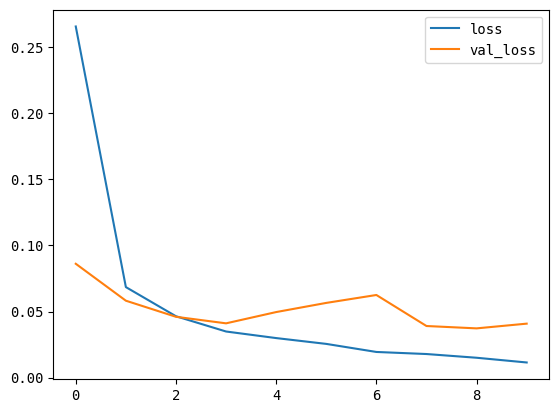

In [6]:
history = pd.DataFrame(history.history)
history[["loss", "val_loss"]].plot()

In [7]:
preds = model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 2s 6ms/step


In [8]:
model.save("mnist_cnn.keras")

## Análisis de la explicabilidad

Ahora vamos a explorar el uso de los métodos Integrated Gradients y LRP para explicar el modelo de clasificación de imágenes.

El primer paso requerido por el paquete `innvestigate` es deshabilitar la ejecución de TensorFlow en modo eager. Esto quiere decir que las operaciones de TensorFlow se ejecutarán en modo gráfico, lo que permite a `innvestigate` analizar la estructura del modelo.

In [9]:
import innvestigate

Debemos tener en cuenta que `innvestigate` funciona solo cuando la ultima capa del modelo no tiene activación, debido a ello habiamos definido previamente la capa de salida como `None`.

Ahora crearemos el analizador.

In [10]:
with tf.compat.v1.Session() as sess:
    model = tf.keras.models.load_model("mnist_cnn.keras")
    idx = np.random.randint(0, 10000, 10)
    analyzer = innvestigate.create_analyzer("integrated_gradients", model)
    analysis = np.array(
        [analyzer.analyze(_input.reshape(1, 28, 28, 1)) for _input in x_test[idx]]
    ).squeeze()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Ahora vamos a analizar una imagen de ejemplo con el modelo y el analizador.

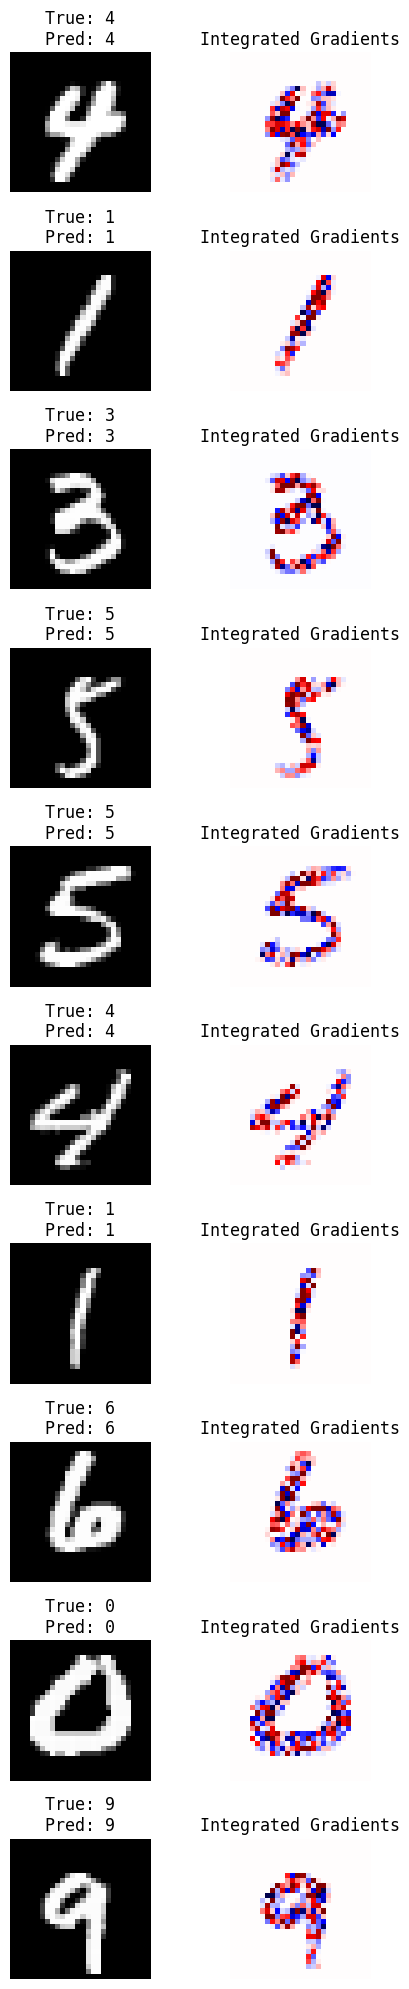

In [11]:
fig, axs = plt.subplots(10, 2, figsize=(5, 20))
for i, j in enumerate(idx):
    axs[i, 0].imshow(x_test[j, :, :, 0], cmap="gray")
    axs[i, 0].axis("off")
    axs[i, 0].set_title(f"True: {y_test[j]}\nPred: {preds[j]}")
    axs[i, 1].imshow(analysis[i], cmap="seismic", vmin=-0.01, vmax=0.01)
    axs[i, 1].axis("off")
    axs[i, 1].set_title("Integrated Gradients")

fig.tight_layout()

Ahora vamos a explorar con el LRP

In [12]:
with tf.compat.v1.Session() as sess:
    model = tf.keras.models.load_model("mnist_cnn.keras")
    analyzer_lrp = innvestigate.create_analyzer("lrp.sequential_preset_a", model)
    analysis_lrp = np.array(
        [analyzer_lrp.analyze(_input.reshape(1, 28, 28, 1)) for _input in x_test[idx]]
    ).squeeze()

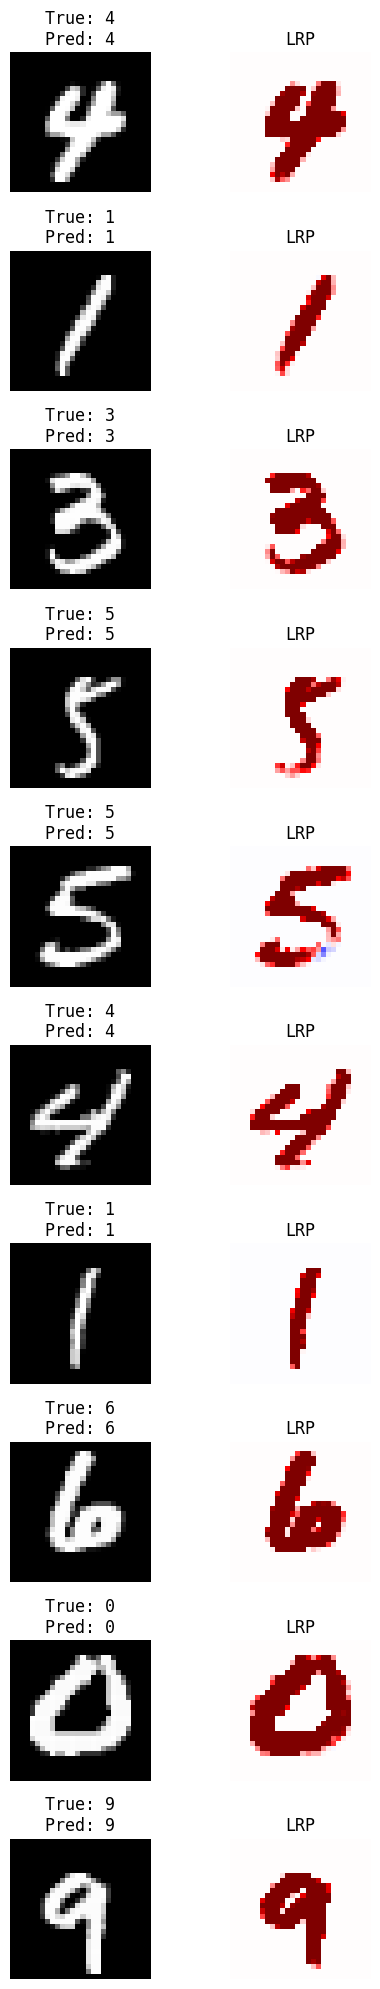

In [13]:
fig, axs = plt.subplots(10, 2, figsize=(5, 20))
for i, j in enumerate(idx):
    axs[i, 0].imshow(x_test[j, :, :, 0], cmap="gray")
    axs[i, 0].axis("off")
    axs[i, 0].set_title(f"True: {y_test[j]}\nPred: {preds[j]}")
    axs[i, 1].imshow(analysis_lrp[i], cmap="seismic", vmin=-0.0001, vmax=0.0001)
    axs[i, 1].axis("off")
    axs[i, 1].set_title("LRP")

fig.tight_layout()

Combinando todo lado a lado

In [14]:
with tf.compat.v1.Session() as sess:
    model = tf.keras.models.load_model("mnist_cnn.keras")
    idx = np.random.randint(0, 10000, 10)
    analyzer = innvestigate.create_analyzer("integrated_gradients", model)
    analysis = np.array(
        [analyzer.analyze(_input.reshape(1, 28, 28, 1)) for _input in x_test[idx]]
    ).squeeze()

    analyzer_lrp = innvestigate.create_analyzer("lrp.sequential_preset_a", model)
    analysis_lrp = np.array(
        [analyzer_lrp.analyze(_input.reshape(1, 28, 28, 1)) for _input in x_test[idx]]
    ).squeeze()

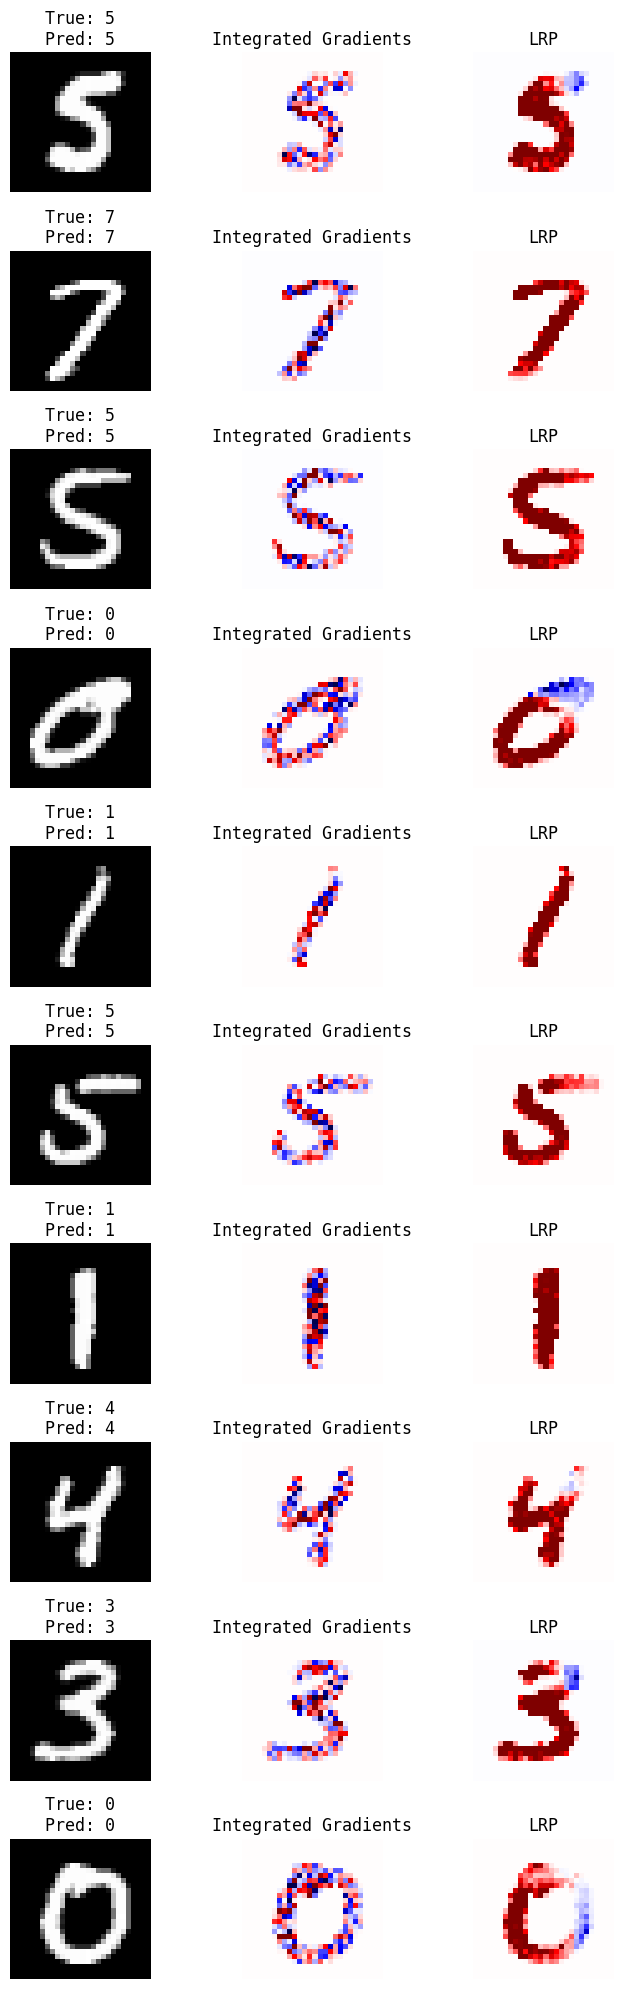

In [15]:
fig, axs = plt.subplots(10, 3, figsize=(7.5, 20))
for i, j in enumerate(idx):
    axs[i, 0].imshow(x_test[j, :, :, 0], cmap="gray")
    axs[i, 0].axis("off")
    axs[i, 0].set_title(f"True: {y_test[j]}\nPred: {preds[j]}")
    axs[i, 1].imshow(analysis[i], cmap="seismic", vmin=-0.01, vmax=0.01)
    axs[i, 1].axis("off")
    axs[i, 1].set_title("Integrated Gradients")
    axs[i, 2].imshow(analysis_lrp[i], cmap="seismic", vmin=-0.0001, vmax=0.0001)
    axs[i, 2].axis("off")
    axs[i, 2].set_title("LRP")

fig.tight_layout()